## Загружаем нужные библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url = 'https://github.com/OlyaKotova/MachineLearning/tree/master/Data_Cortex_Nuclear(csv).csv'
data = pd.read_csv(url, sep = ',', engine = 'python')

## Заполнение пустых

In [5]:
data.count(axis = 0)

MouseID            1080
DYRK1A_N           1077
ITSN1_N            1077
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1077
pBRAF_N            1077
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1077
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1077
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1073
TRKA_N             1077
                   ... 
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N              1080
GFAP_N             1080
GluR3_N            1080
GluR4_N            1080
IL1B_N             1080
P3525_N         

Есть пропущеные значения

In [7]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [9]:
data.count(axis = 0)

MouseID            1080
DYRK1A_N           1080
ITSN1_N            1080
BDNF_N             1080
NR1_N              1080
NR2A_N             1080
pAKT_N             1080
pBRAF_N            1080
pCAMKII_N          1080
pCREB_N            1080
pELK_N             1080
pERK_N             1080
pJNK_N             1080
PKCA_N             1080
pMEK_N             1080
pNR1_N             1080
pNR2A_N            1080
pNR2B_N            1080
pPKCAB_N           1080
pRSK_N             1080
AKT_N              1080
BRAF_N             1080
CAMKII_N           1080
CREB_N             1080
ELK_N              1080
ERK_N              1080
GSK3B_N            1080
JNK_N              1080
MEK_N              1080
TRKA_N             1080
                   ... 
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N              1080
GFAP_N             1080
GluR3_N            1080
GluR4_N            1080
IL1B_N             1080
P3525_N         

удаление столбцов

In [10]:
data = data.drop('Genotype', axis = 1)  # повотряется
data = data.drop('Treatment', axis = 1) # повотряется
data = data.drop('Behavior', axis = 1)  # повотряется
    
data = data.drop('MouseID', axis = 1)   # индетификатор

In [12]:
X = data.drop(('class'), axis = 1)
y = data['class']

In [13]:
print(X.shape)
print(y.shape)

(1080, 77)
(1080,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)
N_test, _ = X_test.shape

# RCA

Попробуем сократить количество признаков с 77 до 50.

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 50)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

In [37]:
from sklearn import ensemble
rf = ensemble.GradientBoostingClassifier(n_estimators = 23)
rf.fit(X_train_reduc, y_train)

err_train = np.mean(y_train != rf.predict(X_train_reduc))
err_test  = np.mean(y_test  != rf.predict(X_test_reduc))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)
if err_test > err_train : print("Возможно переобучение")

Ошибка на обучающей выборке:  0.00154320987654
Ошибка на тестовой выборке:  0.0949074074074
Возможно переобучение


Найдем число признаков, которые дадут минимальную ошибку.

In [38]:
components = np.arange(1, 77, 2)
test_err = []
train_err = []
for component in components:
    pca = decomposition.PCA(n_components = component)
    X_train_reduc = pca.fit_transform(X_train)
    X_test_reduc = pca.transform(X_test)
    ert = ensemble.GradientBoostingClassifier(n_estimators = 23)
    ert.fit(X_train_reduc, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train_reduc)))
    test_err.append(np.mean(y_test  != ert.predict(X_test_reduc)))

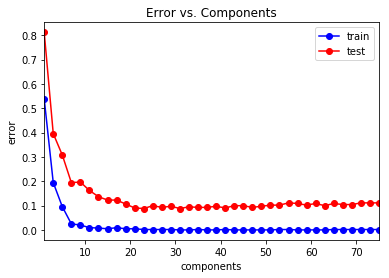

In [40]:
plt.plot(components, train_err, 'b-o', label = 'train')
plt.plot(components, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components), np.max(components)])
plt.title('Error vs. Components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

Вероятность ошибки на разных тестовых и обучающих выборках практически не зависит от количества признаков.
Найдём число признаков, соответствующих минимальной ошибке, а также саму ошибку.

In [43]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

components_opt = components[test_err == min_test_err]
components_opt = components_opt[0]

print("Число признаков соответствующих минимальной ошибке: ", components_opt)
print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)
if err_test > err_train : print("Возможно переобучение")

Число признаков соответствующих минимальной ошибке:  23
Ошибка на обучающей выборке:  0.00154320987654
Ошибка на тестовой выборке:  0.0949074074074
Возможно переобучение


Вывод: Число признаков, которое было определено методом подбора совпадает с ответом. 